<a href="https://colab.research.google.com/github/srivatsan88/Tensorflow2.0_Samples/blob/master/Tensorflow2_0_FashionMinst_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tf-nightly-2.0-preview

In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0-dev20190228


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function


In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

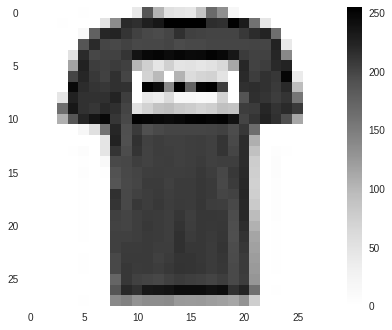

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

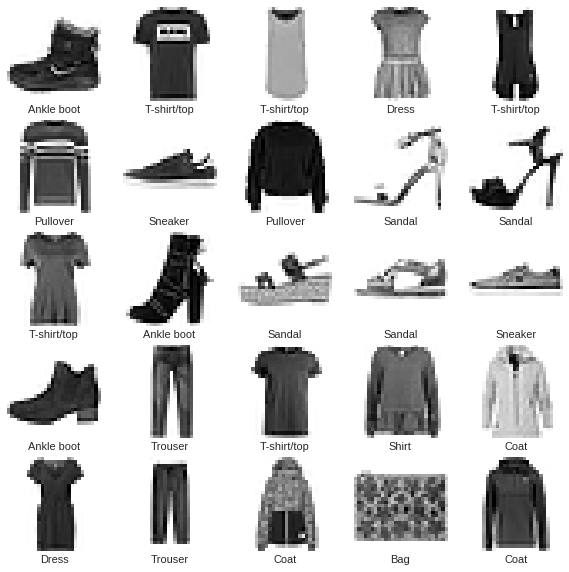

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5046 - accuracy: 0.8232
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3759 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3399 - accuracy: 0.8762
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3127 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2965 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2808 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2696 - accuracy: 0.8994
Epoch 8/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2604 - accuracy: 0.9030
Epoch 9/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2489 - accuracy: 0.9066
Epoch 10/10
60000/60000 [===========

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3319 - accuracy: 0.8872
Accuracy: 0.8872


In [0]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([8.0768432e-06, 3.8090375e-09, 7.0007489e-09, 1.0030180e-11,
       9.9825812e-08, 3.9474540e-03, 3.2809488e-08, 8.5801817e-03,
       4.3792068e-05, 9.8742038e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

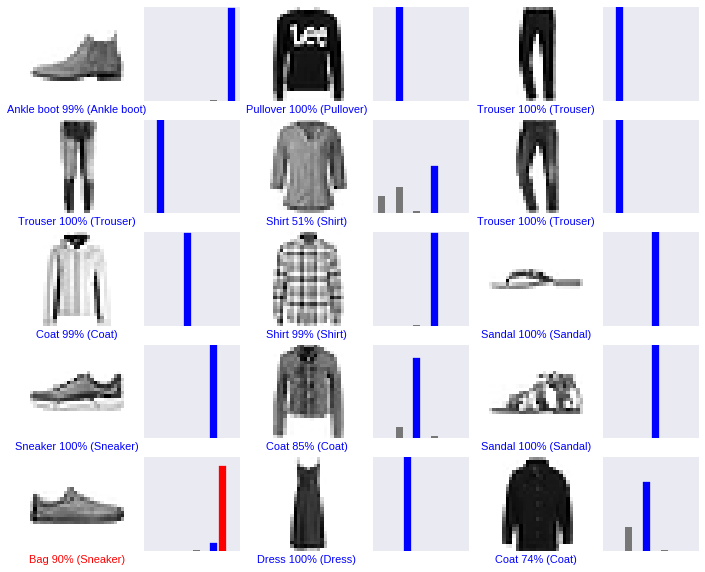

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
img = test_images[0]
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.0768432e-06 3.8090517e-09 7.0007355e-09 1.0030199e-11 9.9826003e-08
  3.9474578e-03 3.2809549e-08 8.5801659e-03 4.3792068e-05 9.8742038e-01]]


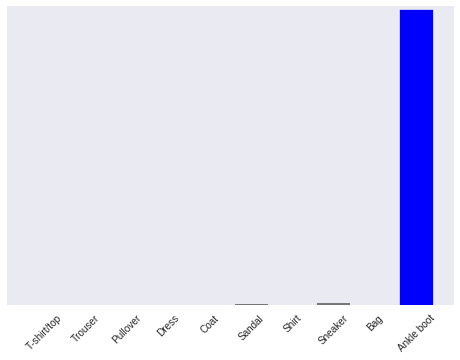

In [23]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
